In [20]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from sklearn import metrics


## Question 6 a ##
In this section we load the train data,test data and message data.


In [21]:
TrainData = np.load("TrainData.pkl" , allow_pickle= True)
TestData = np.load("TestData.pkl", allow_pickle= True)
MessageData = np.load("MessageData.pkl", allow_pickle= True)

TrainData["X"]  = TrainData["X"].astype("float64")
TestData["X"]  = TestData["X"].astype("float64")


## Question 6 b ##
we plot all the images with it's title by unique from Numpy to find the uniqueIndex, in other wards find the index of ech letter.

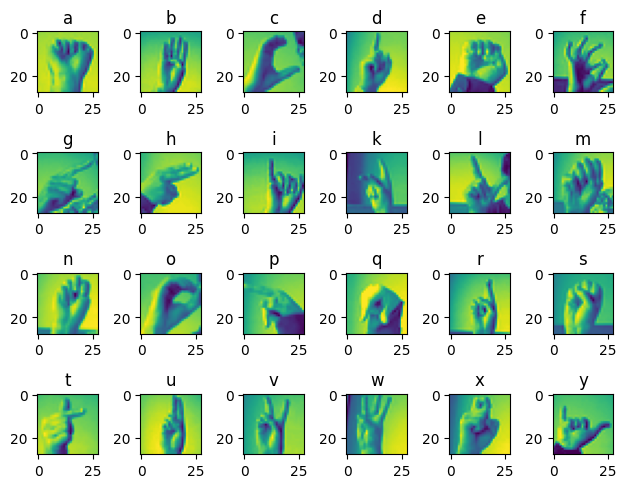

In [4]:
UniqueLabelsTrain, UniqueIndexTrain = np.unique(TrainData["Y"], return_index=True) # Calculate the the unique labels and the index

def PrintPicByFile(UniqueLabelsTrain, UniqueIndexTrain, GetFile):
    for index  in range(24):# plot all the letters
        plt.subplot(4,6,index+1)
        Image = GetFile[:,:,UniqueIndexTrain[index]]
        plot = plt.imshow(Image)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.title(chr(97 + UniqueLabelsTrain[index])) # By adding 97 to the index we can tranlate the labels into letters by using ASCII



PrintPicByFile(UniqueLabelsTrain, UniqueIndexTrain,TrainData["X"])

## Question 6 c ##
in this operation we converted the data to 2D by concatenation the lines.

In [22]:

ResizeMatrix = np.zeros((27455,784))
for colIndex  in range (27455):
    tempVector = []
    for  rowIndex in range (28):

       tempVector.append(TrainData["X"][rowIndex,:,colIndex])


    ResizeMatrix[colIndex,:] = (np.reshape(tempVector,(1,784)))

## Question 7 - the proof of this section is included in the pdf that we uploaded ##

## Question 8 a ##
in this function we calculated Miu, covariance matrics and Pi vector by getting a matrics for TrainData.pkl.

In [23]:
def maximumLiklihood(matrix):
    covMatrix = []
    Miu = []
    for i in range(25):
        Miu.append(np.mean(matrix[TrainData["Y"] == i], axis= 0))
        covMatrix.append(np.cov(matrix[TrainData["Y"] == i],rowvar=False))
    PiVector = []
    for index in range(25):
        PiVector.append((np.sum(TrainData["Y"] == index))/len(TrainData["Y"]))
    covMatrix[9] = np.zeros((784,784)) #דחיפת אפסים ב9 בגלל שאין את האות 9 במידע שלנו
    return Miu,np.array(covMatrix),PiVector

Miu,covM,PiVector = maximumLiklihood(ResizeMatrix)

<ipython-input-23-5ce10d1bf61f>:6: RuntimeWarning: Degrees of freedom <= 0 for slice
  covMatrix.append(np.cov(matrix[TrainData["Y"] == i],rowvar=False))


## Question 8 b ##
Our function takes all the parameters of our data such as propability and cov and eig vals and so on.
The function  return the label of the test picture.

In [24]:
def Sivog(Miu, PiVector, ExampleImage, ArachimAtsmim,InversCOV):
    SigmaArachim = np.sum(np.log(ArachimAtsmim))
    SigmaArachim = -0.5*SigmaArachim
    bbT = np.transpose(ExampleImage - Miu)
    bb = (ExampleImage - Miu)
    lnPai = np.log(PiVector)
    temp = bb @ InversCOV
    temp = temp @ bbT
    finalResult = SigmaArachim + (-0.5 *  temp ) + lnPai

    return  finalResult



## Calculate the eig vals and inv cov ##

In [25]:
# In this part i calculate the eigvals and the inverse cov outside the sivog function for better time complexity
arachimAtsmim =np.linalg.eigvals(covM)
inverseCovari = []
for i in range (25):
    if i != 9:
     inverseCovari.append(np.linalg.inv(covM[i]))

## Question 8 c ##

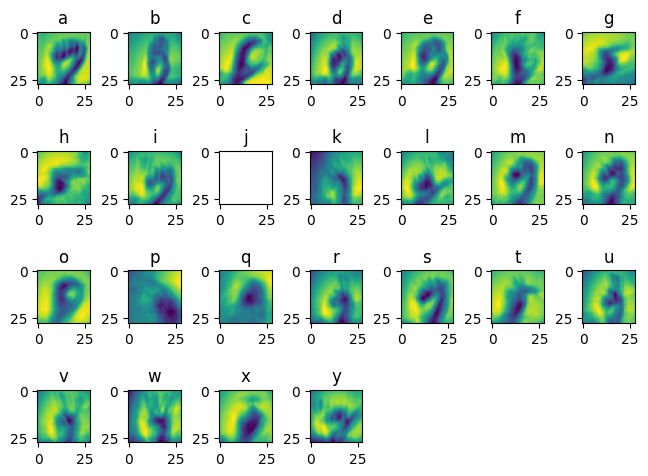

In [9]:
#question 8 saif c

for i  in range(25):
    #if i != 9 :
        plt.subplot(4,7,i+1)
        Image = Miu[i].reshape(28,28)
        plot = plt.imshow(Image)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        if i < 9:
            plt.title(chr(97 + UniqueLabelsTrain[i])) # By adding 97 to the index we can tranlate the labels into letters by using ASCII
        if i >= 9 and i != 24:
            plt.title(chr(96 + UniqueLabelsTrain[i])) # By adding 97 to the index we can tranlate the labels into letters by using ASCII
        if i == 24:
            plt.title('y')




As we can see our images is more blury as we except, this time we plot our pictures by the mean values and the mean values is not the same as the original data.
Of corse when we plotting the images by the full data and not the mean of the data we get a sharper image, because we use more accurate data.

## Question 9 a TrainData.pkl ##


In [10]:
def classifierFunc(fileData, Miu, PiVector, ResizeMatrix, arachimAtsmim, inverseCovari):
    TrueFalseVector = []
    allSivogVec = []
    for picIndex in range (len(fileData)):
        SivogVector = []
        for i in range(25):
            if i < 9:
                SivogVector.append(Sivog(Miu[i], PiVector[i],ResizeMatrix[picIndex, :], arachimAtsmim[i],inverseCovari[i]))
            if i > 9:
                SivogVector.append(Sivog(Miu[i], PiVector[i],ResizeMatrix[picIndex, :], arachimAtsmim[i],inverseCovari[i-1]))
            if i == 9 :
                SivogVector.append(np.NINF)


        TrueFalseVector.append(fileData[picIndex] == np.argmax(SivogVector))
        allSivogVec.append(np.argmax(SivogVector))


    Acc = (TrueFalseVector.count(True)/len(fileData))
    print("Accurate (Pc) on data: ",Acc)
    return allSivogVec


allSivogVec = classifierFunc(TrainData["Y"], Miu, PiVector, ResizeMatrix, arachimAtsmim, inverseCovari)

Accurate (Pc) on data:  1.0


## Accure (The result on the top) ##
To calculate the accuracy (between 0 & 1) of our qda we run over our test data and saved the letters that the classifier gave us.
After that we cheack how many correct labels we get and print the accuracy.
Our accuracy is 1 and that mean our qda succsfuly classify the train data with 100%.

## Question 9 b & c ##
in the confusion matrix we can see a value of the letter depending on the row index, and what we get is slan of values of each letter. Moreover we got a Precision and Recall that equals to 1, it's make sense because our accuracy is 100% so it's as expected.


In [11]:
#question 9 :- b + c

confusionMatrix = metrics.confusion_matrix(TrainData["Y"], allSivogVec)

print("confusion matrix :  \n", confusionMatrix)
Precision = metrics.precision_score(TrainData["Y"], allSivogVec, average='weighted')

Recall = metrics.recall_score(TrainData["Y"], allSivogVec, average='weighted')
print("\n")
print("Precision: ",Precision)
print("Recall: ",Recall)


confusion matrix :  
 [[1126    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0 1144    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1196    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  957    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1204    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1090    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1013    0    0    0    0    0    0
     0    0    0    0    0    0

## Question 9 redoing 6 b this time on the test .pkl ##

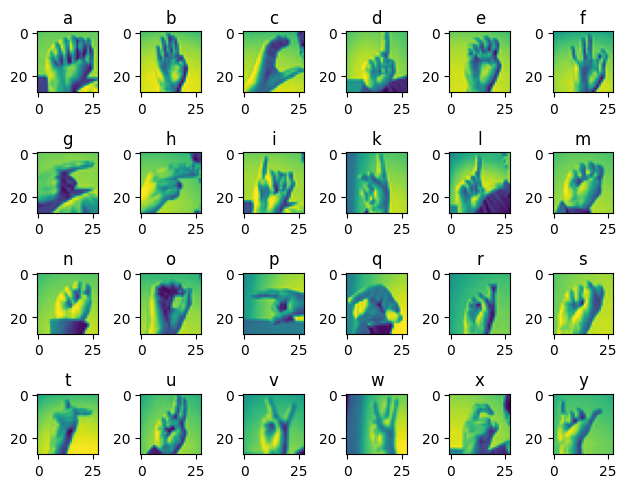

In [12]:
UniqueLabelsTest, UniqueIndexTest = np.unique(TestData["Y"], return_index=True) # Calculate the the unique labels and the index

PrintPicByFile(UniqueLabelsTest,UniqueIndexTest,TestData["X"])

thats are the pictures with the letters that reffers to test data file, without duplicates.

## Question 9 redoing 6 c this time on the test .pkl ##

In [13]:
# the difference here is the examples befor we got 27455 pictures and now we got 5101 pictuers in the test therefor we changed the shapes as needed.
ResizeMatrixTest = np.zeros((5101,784))
for colIndex  in range (5101):
    tempVectorTest = []
    for  rowIndex in range (28):

       tempVectorTest.append(TestData["X"][rowIndex,:,colIndex])


    ResizeMatrixTest[colIndex,:] = (np.reshape(tempVectorTest,(1,784)))
print(ResizeMatrixTest.shape)

(5101, 784)


this function is the same function as maximusliklihood function that we saw befor, the only difference here that in this function used TestData["Y"] except TrainData["Y"].

## Question 9 redoing 8 a this time on the test .pkl ##

In [14]:
def maximumLiklihoodTest(matrix):
    covMatrix = []
    Miu = []
    for i in range(25):
        Miu.append(np.mean(matrix[TestData["Y"] == i], axis= 0))
        covMatrix.append(np.cov(matrix[TestData["Y"] == i],rowvar=False))
    PiVector = []
    for index in range(25):
        PiVector.append((np.sum(TestData["Y"] == index))/len(TestData["Y"]))
    covMatrix[9] = np.zeros((784,784)) #דחיפת אפסים ב9 בגלל שאין את האות 9 במידע שלנו
    return Miu,np.array(covMatrix),PiVector

MiuTest,covMTest,PiVectorTest = maximumLiklihoodTest(ResizeMatrixTest)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
<ipython-input-14-92f8567e94d8>:6: RuntimeWarning: Degrees of freedom <= 0 for slice
  covMatrix.append(np.cov(matrix[TestData["Y"] == i],rowvar=False))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [15]:
arachimAtsmimTest =np.linalg.eigvals(covMTest)
inverseCovariTest = []
for i in range (25):
    if i != 9:
     inverseCovariTest.append(np.linalg.inv(covMTest[i]))

## Question 9 redoing 8 b this time on the test .pkl ##

In this part i calculate the eigvals and the inverse cov outside the sivog function for better time complexity


In [16]:
def Sivog(MiuTest, PiVectorTest, ExampleImage, ArachimAtsmim,InversCOV):
    SigmaArachim = np.sum(np.log(ArachimAtsmim))
    SigmaArachim = -0.5*SigmaArachim
    bbT = np.transpose(ExampleImage - MiuTest)
    bb = (ExampleImage - Miu)
    lnPai = np.log(PiVectorTest)
    temp = bb @ InversCOV
    temp = temp @ bbT
    finalResultTest = SigmaArachim + (-0.5 *  temp ) + lnPai

    return  finalResultTest



## Question 9 checking the accuracy on testData.pkl ##

Before  when we run over the train data and  we got accuracy of 1 and that make sense because we test the data that we used to train our classifier.  this time, we test our test data and that NOT the data we used to tech  our classifier, the parameters of the maximum likelihood function match the train data and not the test data and because of that we got a diffrent  accuracy.  as we can see the accuracy is NOT 1 but really really close so our classifier works fine.

In [26]:
classifierFunc(TestData["Y"], Miu, PiVector, ResizeMatrixTest, arachimAtsmim, inverseCovari)


Accurate (Pc) on data:  0.9243285630268575


[6,
 5,
 10,
 0,
 3,
 10,
 14,
 3,
 7,
 8,
 8,
 4,
 22,
 0,
 2,
 0,
 10,
 8,
 19,
 3,
 21,
 3,
 18,
 14,
 8,
 14,
 5,
 17,
 13,
 20,
 22,
 5,
 16,
 16,
 22,
 13,
 11,
 22,
 2,
 10,
 18,
 4,
 20,
 6,
 15,
 4,
 3,
 20,
 11,
 2,
 2,
 17,
 2,
 23,
 12,
 17,
 14,
 2,
 1,
 7,
 23,
 8,
 5,
 0,
 0,
 19,
 8,
 2,
 16,
 1,
 14,
 6,
 5,
 0,
 2,
 16,
 8,
 6,
 11,
 21,
 2,
 23,
 23,
 4,
 22,
 3,
 18,
 7,
 17,
 21,
 6,
 1,
 6,
 10,
 5,
 4,
 3,
 14,
 2,
 10,
 7,
 5,
 14,
 8,
 18,
 23,
 13,
 3,
 6,
 8,
 13,
 16,
 3,
 17,
 18,
 1,
 16,
 23,
 2,
 8,
 24,
 1,
 12,
 23,
 3,
 0,
 13,
 13,
 5,
 7,
 8,
 0,
 14,
 18,
 6,
 3,
 5,
 6,
 10,
 1,
 2,
 17,
 18,
 6,
 5,
 5,
 1,
 21,
 8,
 24,
 15,
 4,
 22,
 16,
 1,
 24,
 24,
 1,
 22,
 19,
 10,
 12,
 3,
 16,
 8,
 17,
 14,
 6,
 20,
 24,
 7,
 4,
 10,
 6,
 0,
 14,
 6,
 24,
 18,
 20,
 6,
 1,
 24,
 1,
 20,
 2,
 1,
 4,
 8,
 0,
 0,
 0,
 21,
 17,
 16,
 2,
 23,
 14,
 12,
 2,
 5,
 5,
 14,
 15,
 18,
 7,
 3,
 1,
 20,
 8,
 13,
 19,
 3,
 18,
 6,
 4,
 24,
 2,
 4,
 24,
 12,
 20,
 21,
